Complete the exercises below For **Assignment #6**.

Import the following items,
- `pandas as pd`,
- `LinearRegression` from the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module,
- `make_column_transformer` from [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose),
- `OneHotEncoder` from [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing),
- `make_pipeline` from the [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) module, and,
- everything from the [plotnine]() package.

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from plotnine import *
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line, geom_hline

## Read in our data for this exercise

Use `pd.read_csv` to read in data from the following URL: http://bit.ly/2IgDF0E. Capture the data into a dataframe called `df_voles`.

❗️Hint: just like in `R` we can read data directly from a URL.

In [6]:
df_voles = pd.read_csv('http://bit.ly/2IgDF0E')

Preview the data with the `.head()` method.

The data contains the variables:

- `site` for the id of each random study site (each case or row is a survey/trapping site)
- `voles` for the vole count at each site
- `veg` for the percent cover of vegetation at each site
- `soil` identifying a site as “moist” or “dry”

In [8]:
df_voles.head()

,site,voles,veg,soil
0,1,17,4,moist
1,2,30,33,moist
2,3,54,94,moist
3,4,49,64,moist
4,5,34,32,moist


## EDA

Let's make a few figures from `df_voles` using `ggplot` from **Plotnine**.

In the cell below plot the `voles` variable (y-axis) versus the `veg` variable and color points by the `soil` variable.

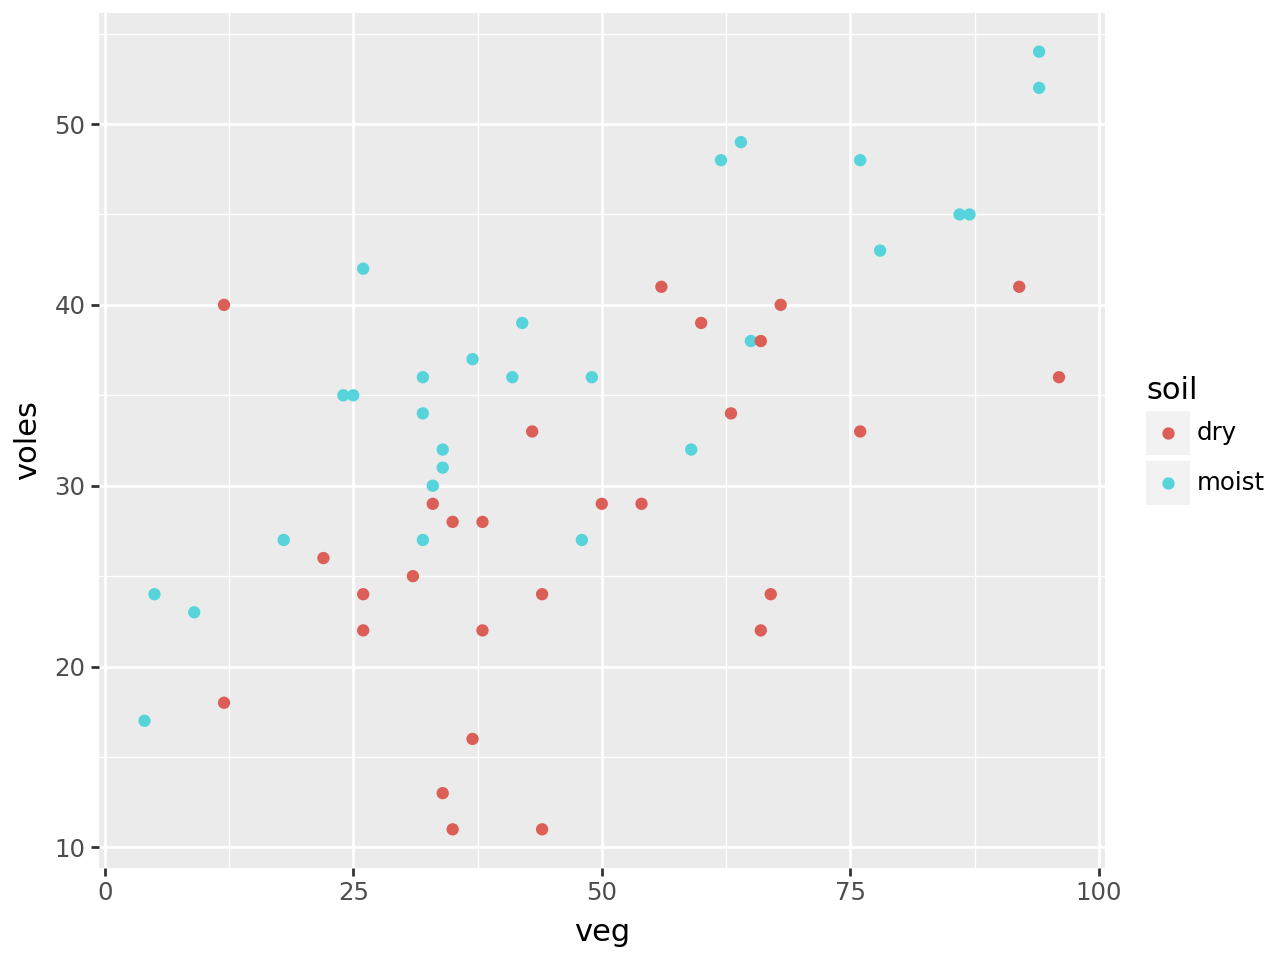

In [12]:
ggplot(df_voles, aes(x = 'veg', y = 'voles', color = 'soil')) + geom_point()

## Modeling

In the cell below, model `voles` with `soil` and `veg` as predictors in a parallel slopes model. 

Here are the steps I would take:
1. Make a column transformer with `make_column_transformer` that transforms `soil` with `OneHotEncoder(drop="first")` and passes 'veg' through untransformed.
2. Create a pipeline with `make_pipeline` using the column transformer from above and `LinearRegression()` as my model. 
3. Get the `X` (training data) and `y` predictor from `df_voles`
4. Use the `.fit()` method for the pipeline to train the model with `X` and `y`. 

In [15]:
ct = make_column_transformer(
    ['passthrough', ['veg']],
    [OneHotEncoder(drop=['moist']), ['soil']]
)

In [16]:
X, y = df_voles[['veg','soil']], df_voles['voles']
ct.fit_transform(X)

array([[ 4.,  0.],
       [33.,  0.],
       [94.,  0.],
       [64.,  0.],
       [32.,  0.],
       [76.,  0.],
       [59.,  0.],
       [78.,  0.],
       [65.,  0.],
       [34.,  0.],
       [87.,  0.],
       [32.,  0.],
       [42.,  0.],
       [ 9.,  0.],
       [ 5.,  0.],
       [25.,  0.],
       [86.,  0.],
       [49.,  0.],
       [41.,  0.],
       [48.,  0.],
       [18.,  0.],
       [34.,  0.],
       [32.,  0.],
       [62.,  0.],
       [24.,  0.],
       [26.,  0.],
       [94.,  0.],
       [37.,  0.],
       [43.,  1.],
       [26.,  1.],
       [66.,  1.],
       [56.,  1.],
       [31.,  1.],
       [35.,  1.],
       [34.,  1.],
       [54.,  1.],
       [92.,  1.],
       [63.,  1.],
       [60.,  1.],
       [37.,  1.],
       [35.,  1.],
       [12.,  1.],
       [12.,  1.],
       [44.,  1.],
       [76.,  1.],
       [44.,  1.],
       [38.,  1.],
       [38.,  1.],
       [67.,  1.],
       [22.,  1.],
       [33.,  1.],
       [66.,  1.],
       [26.,

In [17]:
pl = make_pipeline(
    ct, # or whatever you called your column transformer
    LinearRegression()
)

pl.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['veg']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop=['moist']),
                                                  ['soil'])])),
                ('linearregression', LinearRegression())])

Use the function below to get the parameter values for your model from above.

In [19]:
def get_regression_table(pipeline):
    terms=list(pipeline['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(
        term=terms, 
        estimate=estimates,
    )
    return pd.DataFrame(data)

In [20]:
get_regression_table(pl)

,term,estimate
0,passthrough__veg,0.259069
1,onehotencoder__soil_dry,-9.100298
2,intercept,24.564324


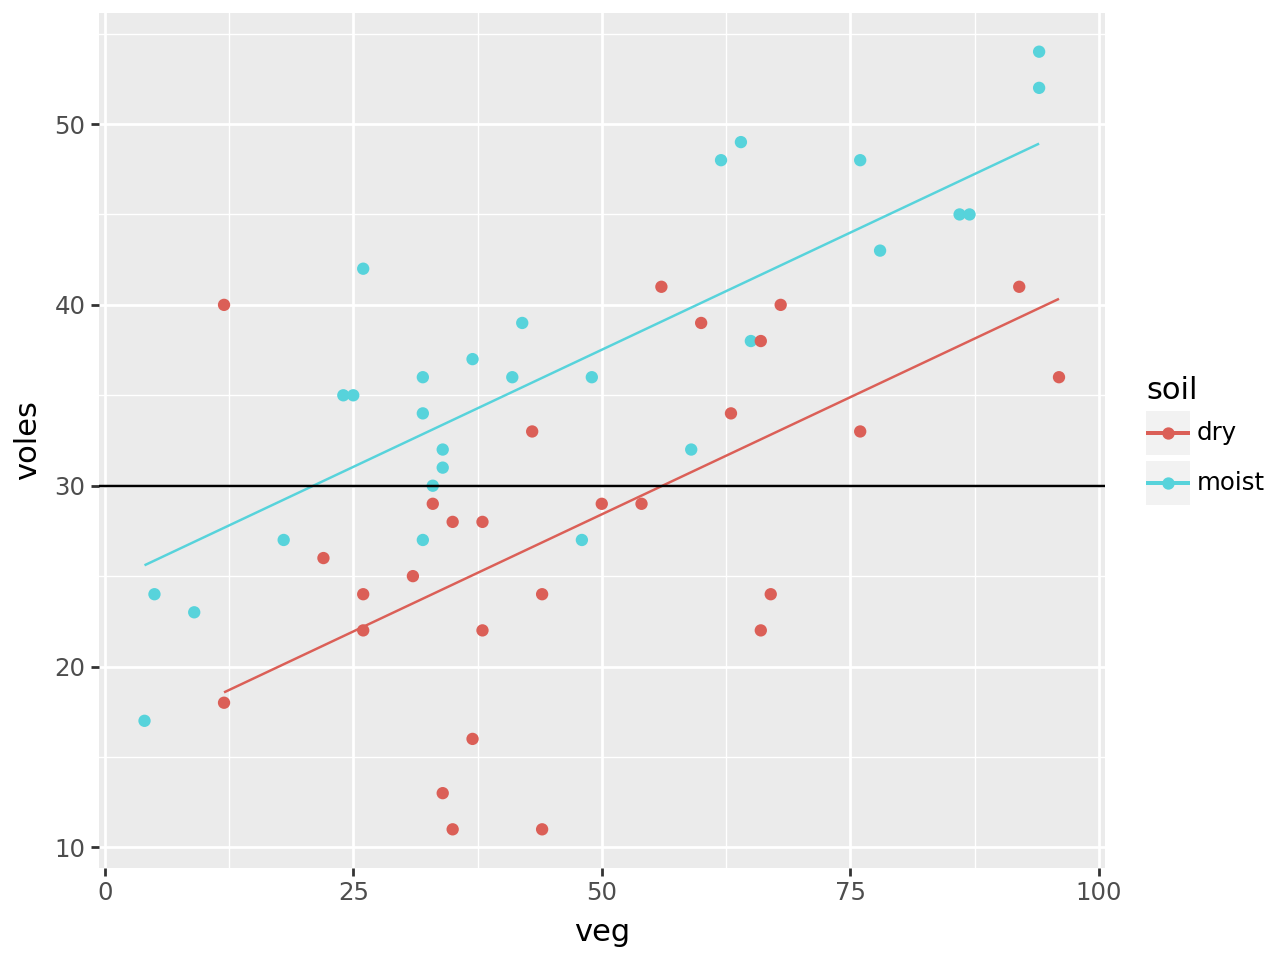

In [21]:
# I added this visualization to plot the model results
df_voles_w_pred = df_voles.assign(pred_voles = lambda df_:pl.predict(df_))
# df_voles_w_pred.head()
(ggplot(df_voles_w_pred, aes(x = 'veg', y = 'voles', color = 'soil')) + 
 geom_point() + 
 geom_line(aes(y = 'pred_voles')) + 
 geom_hline(aes(yintercept = 30), color = 'black'))

❓Would protecting a site with high vegetation cover be a more effective way to preserve the vole population than a site with low vegetation cover? Why?

(**Hint:** use your chart above to answer. It's also possible to leverage your regression parameters if you chose to model `voles` with a parallel slopes model.)

**Answer:**

Yes, because based on the model output table and plot above the line slope is possitive, showing a direct relationship between vole numbers and veg percentage. 

❓Dry sites typically cost a lot less to purchase and maintain for conservation organizations. Thus, if a conservation organization decides to purchase a few dry sites, roughly what percent cover of vegetation do they need to maintain on these sites (at a minimum) to support a population of about 30 voles at the site?

(**Hint:** In your chart above, draw a line at voles = 30 using `geom_hline` and make a rough estimate for this answer...)

**Answer:**

In [25]:
# I also created a function to better know the model parameters 
def dry_fit_line(y, pl):
    x = (y - (pl['linearregression'].intercept_+ pl['linearregression'].coef_[1]))/pl['linearregression'].coef_[0]
    # x = (y - 15.46) / .259
    return x

dry_fit_line(30, pl) 


56.108517946632816

about 56.1 percent

❓The Nature Conservancy is looking at purchasing a site for this species (in the same study area) that has moist soil and 40% vegetation cover. Using the regression equation what would you predict as the possible vole population the site might be able to support?

(**Hint:** Use `.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))` with yout pipeline.)

**Answer:**

In [28]:
pl.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))

array([34.92708151])